Here, in this notebook- Fetal Health Classification has been done using logistic regression.

# **Importing important Libraries**

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
np.random.seed(0)

# Uploading the csv file 

In [2]:
from google.colab import files
uploaded=files.upload()
import pandas as pd
import io
df=pd.read_csv(io.BytesIO(uploaded['fetal_health.csv']))

Saving fetal_health.csv to fetal_health.csv


**Checking the rows and columns in dataset**

In [3]:
df.shape

(2126, 22)

**Recall first five rows of the dataset**

In [4]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


**Check the datatypes of each feature present in the dataset**

In [5]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

**Checking the null values- here we have no null or NaN values**

In [6]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

**Describing the statistics of dataset.**

In [7]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


Plotting the count distribution of each independent variables 

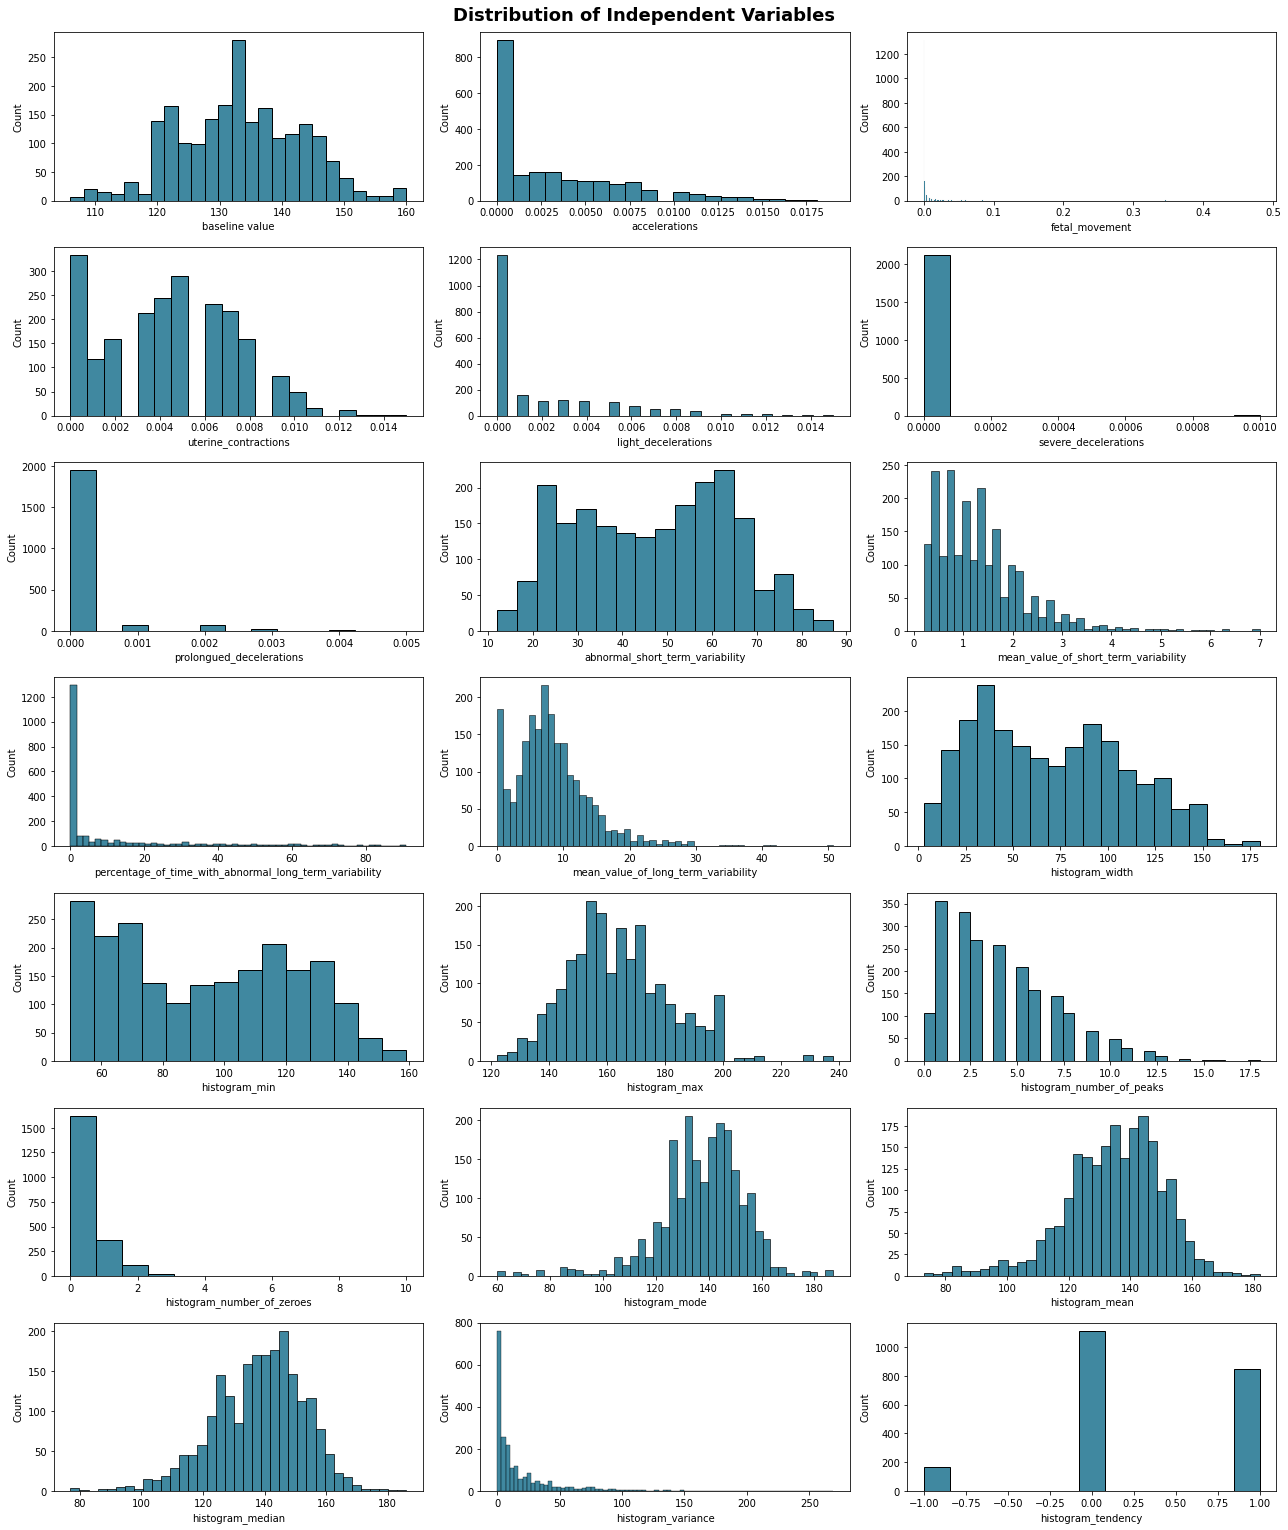

In [8]:
plt.figure(figsize=(18,21))
for i,col in enumerate(df.columns[:-1]):
    plt.subplot(7,3,i+1)
    sns.histplot(x=df[col], color='#006080',edgecolor='#000000')
    plt.suptitle('Distribution of Independent Variables',fontweight='bold', size=18, y=1.01)
plt.tight_layout()
plt.show()

**Plotting the count plot of Target Variable i.e. fetal_health**

Here, we see that there is an irregular distribution of all these classes.

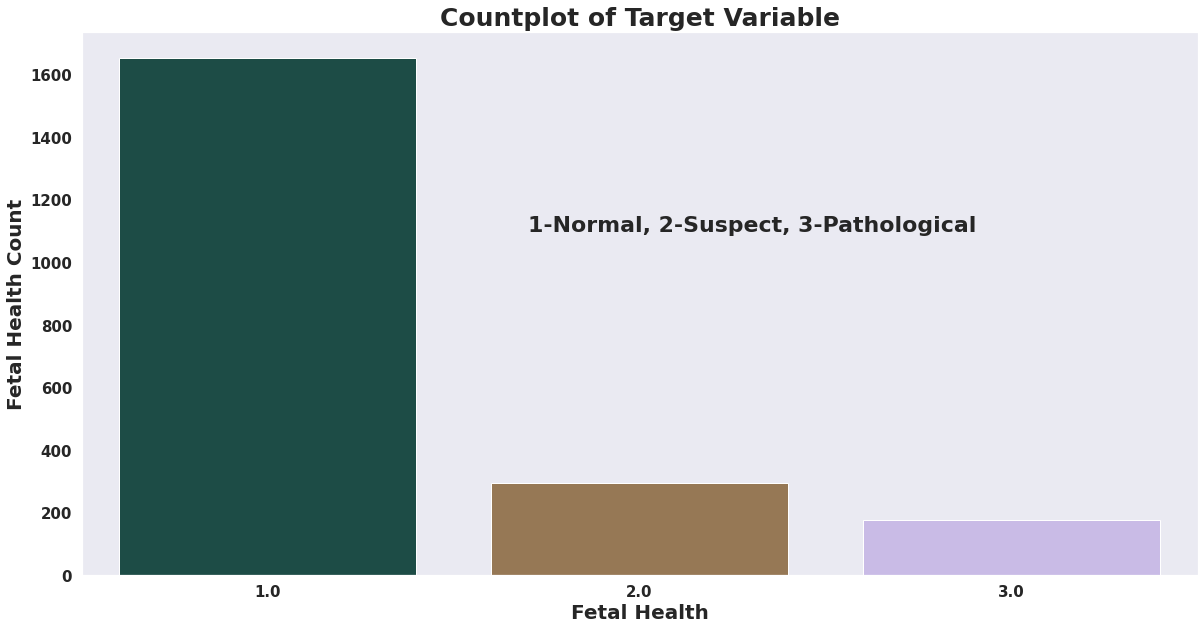

In [11]:
def without_hue(data,feature,ax):
  sns.set_theme(context='notebook',style='darkgrid')
plt.figure(figsize=(20,10))
plt.text(0.7,1100,"1-Normal, 2-Suspect, 3-Pathological",fontweight='bold',fontsize=22,fontstyle='normal')
plt.title("Countplot of Target Variable",fontweight='bold',fontsize=25,fontstyle='normal')
ax=sns.countplot(data=df,x="fetal_health",palette='cubehelix')
plt.xticks(fontweight='bold',fontsize=15)
plt.yticks(fontweight='bold',fontsize=15)
plt.xlabel("Fetal Health",fontweight='bold',fontsize=20,fontstyle='normal')
plt.ylabel("Fetal Health Count",fontweight='bold',fontsize=20,fontstyle='normal')
without_hue(df,"fetal_health",ax)

**Heatmap of independent and dependent variables**

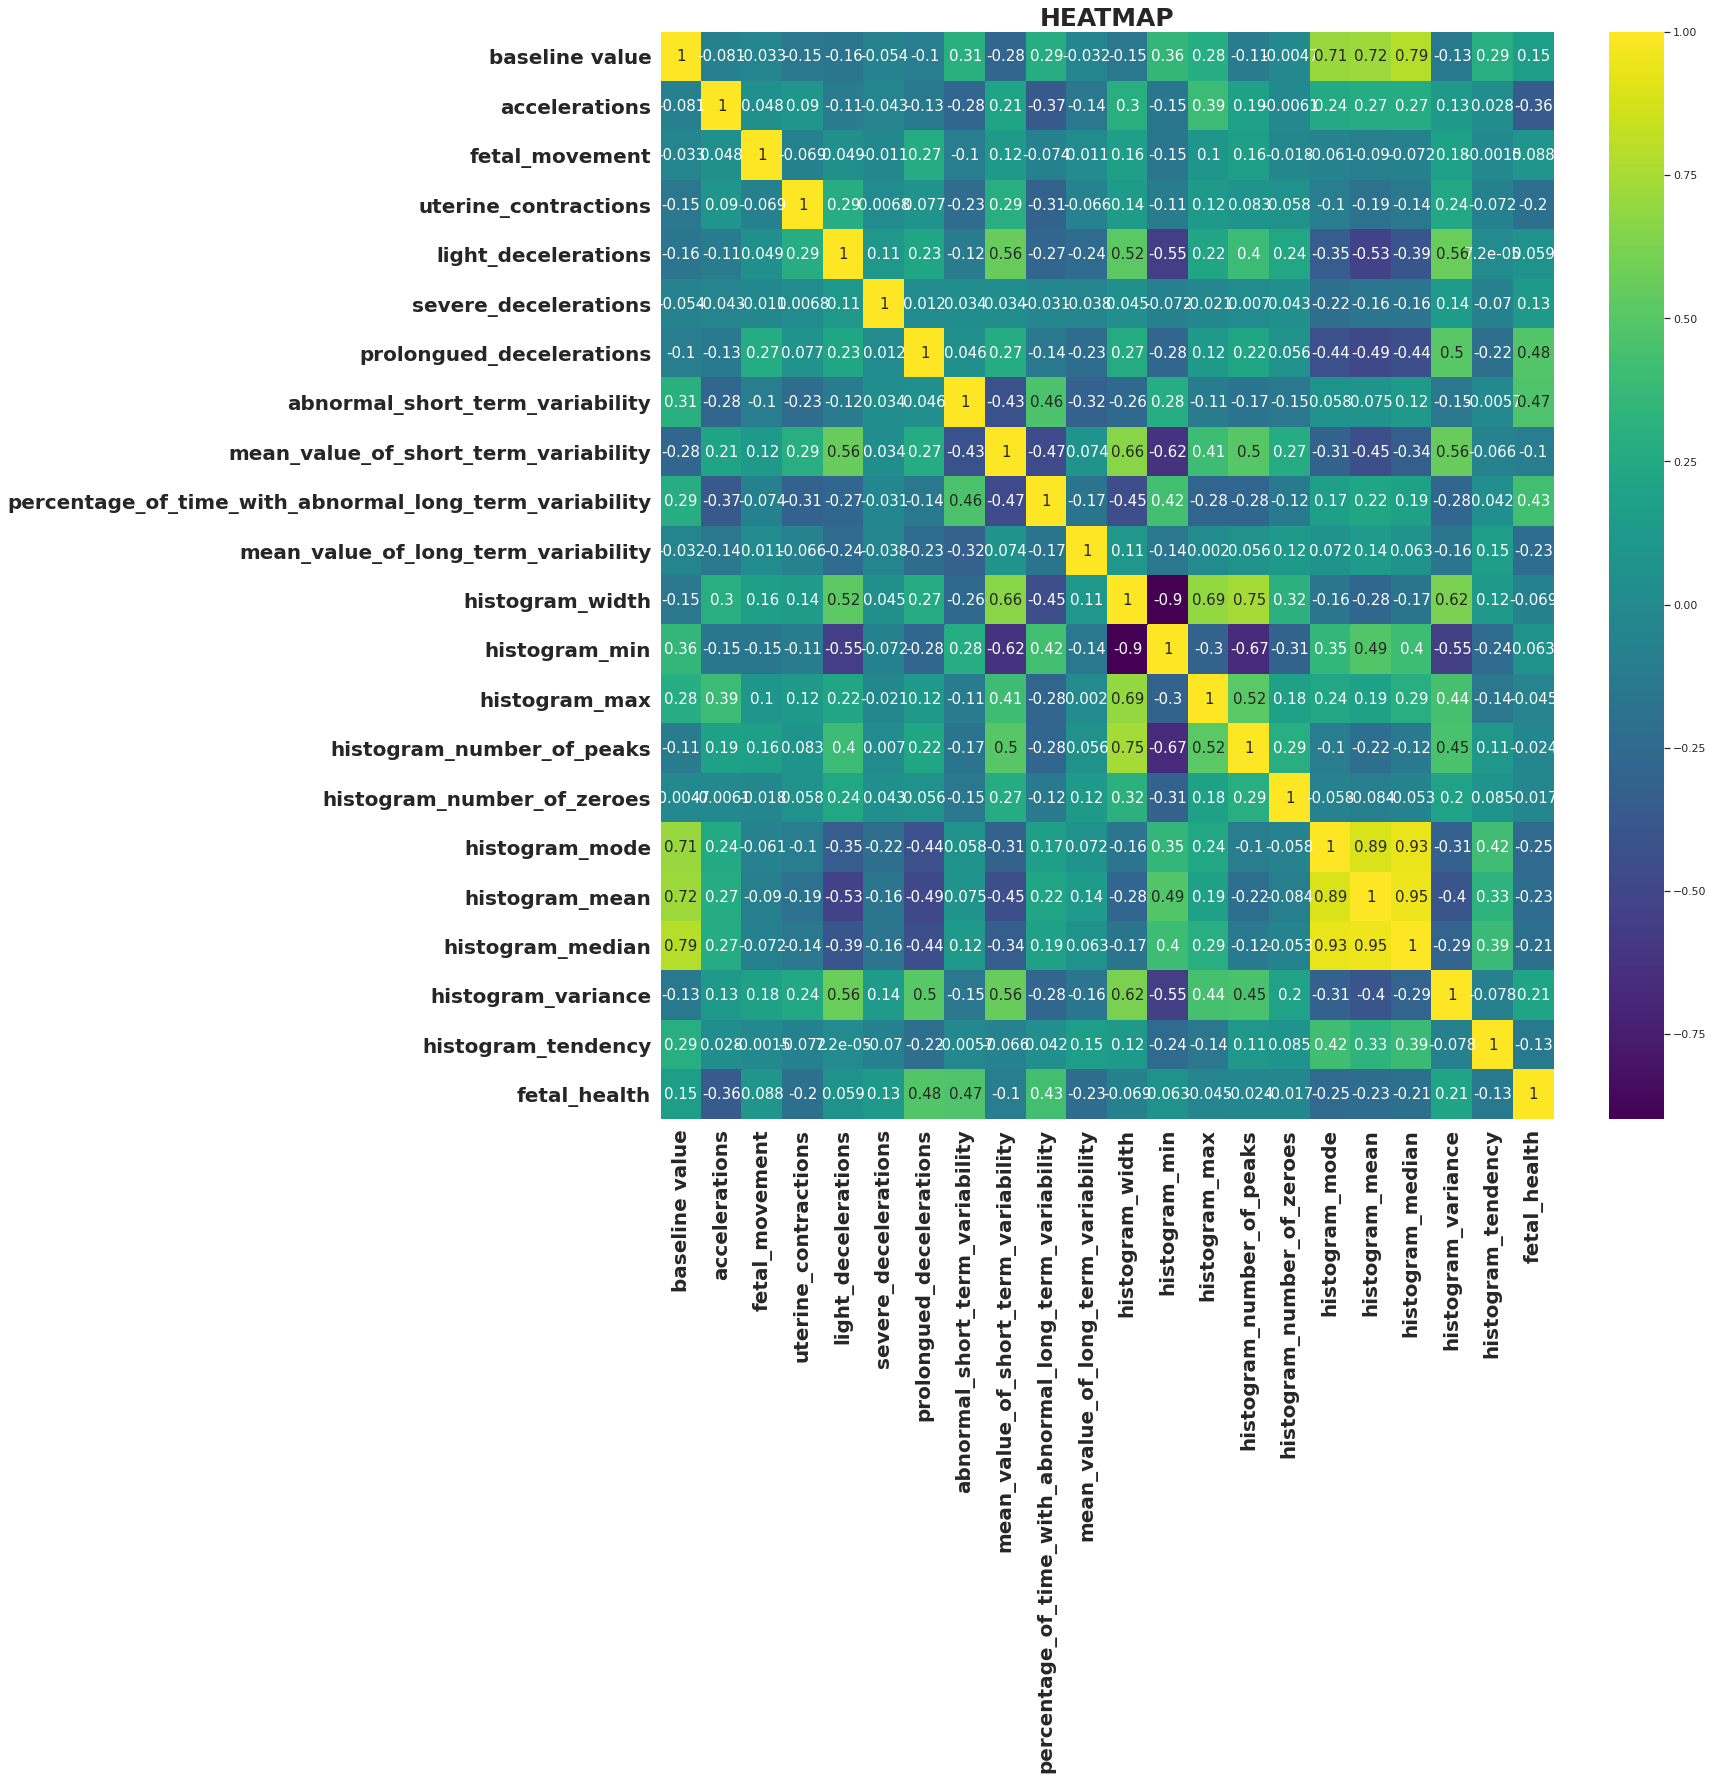

In [12]:
plt.figure(figsize=(20,20))
plt.title("HEATMAP",fontsize=25,fontweight='bold')
sns.heatmap(df.corr(),cmap="viridis",annot=True,annot_kws={'size':15})
plt.yticks(fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold',fontsize=20)
plt.show()

Checking the outliers present in the independent variables. 

In case of medical datasets like the one used here in this notebook : Any value cannot be counted as an outlier since the data is recorded live.

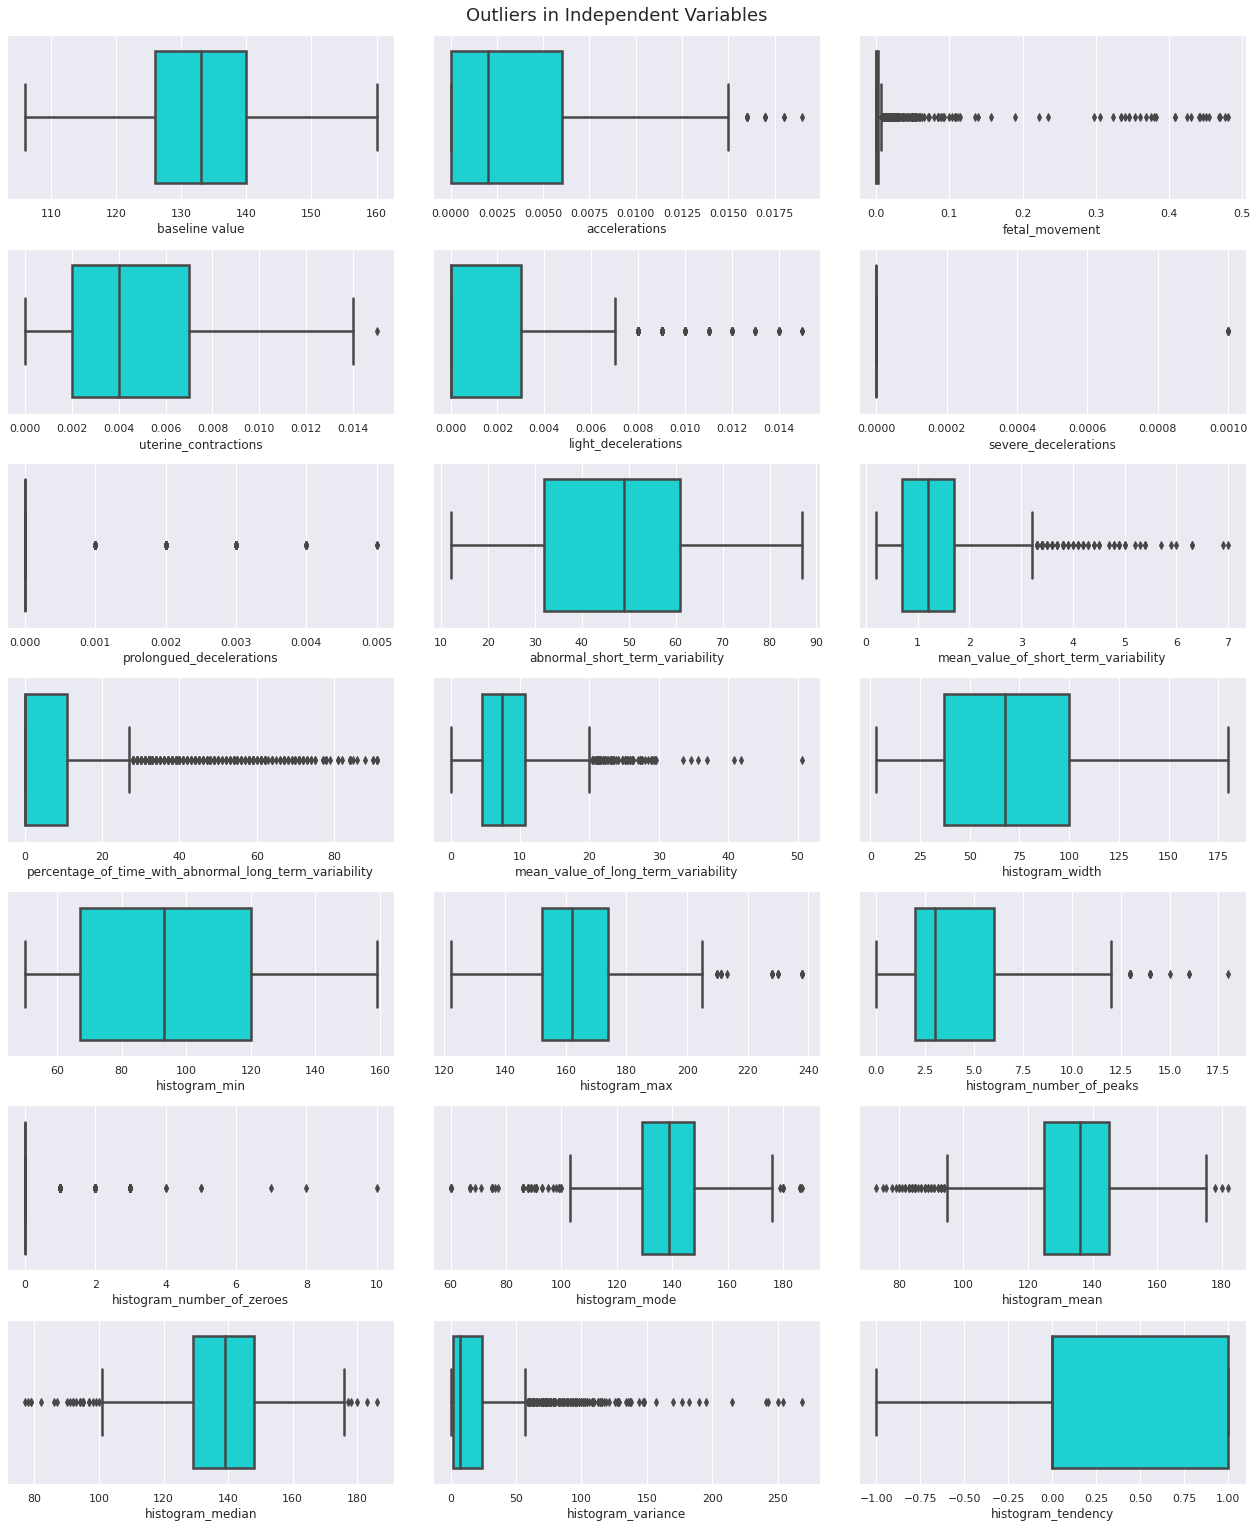

In [13]:
plt.figure(figsize=(18,21))
for i,col in enumerate(df.columns[:-1]):
    plt.subplot(7,3,i+1)
    sns.boxplot(x=df[col], color='#00EEEE',linewidth=2.5)
plt.suptitle('Outliers in Independent Variables', size=18, y=1.01)
plt.tight_layout()
plt.show()

**Separating target variable with the independent variables and further applying standard scaler for scaling or standardization.**


In [14]:
#assigning values to features as X and target as y
X=df.drop(["fetal_health"],axis=1)
y=df["fetal_health"]

#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
count,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03,2.126000e+03
mean,4.161509e-16,-1.535304e-16,-1.958452e-15,-2.632471e-15,-5.139716e-15,7.254767e-16,4.324961e-15,2.687304e-16,-2.481552e-16,2.291362e-15,1.029959e-15,8.564279e-17,-6.120326e-17,-4.047144e-17,2.408965e-16,8.397171e-17,6.141215e-17,-4.183964e-16,1.404751e-16,-3.634597e-17,5.783500e-16
std,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00,1.000235e+00
min,-2.775197e+00,-8.223883e-01,-2.032096e-01,-1.482465e+00,-6.384375e-01,-5.747560e-02,-2.687543e-01,-2.035639e+00,-1.282833e+00,-5.353613e-01,-1.455081e+00,-1.731757e+00,-1.474609e+00,-2.342558e+00,-1.379664e+00,-4.584438e-01,-4.729191e+00,-3.951945e+00,-4.223849e+00,-6.492081e-01,-2.162031e+00
25%,-7.423728e-01,-8.223883e-01,-2.032096e-01,-8.034341e-01,-6.384375e-01,-5.747560e-02,-2.687543e-01,-8.720881e-01,-7.166031e-01,-5.353613e-01,-6.375828e-01,-8.587648e-01,-8.993760e-01,-6.703135e-01,-7.013968e-01,-4.584438e-01,-5.160773e-01,-6.164580e-01,-6.285137e-01,-5.801731e-01,-5.245255e-01
50%,-3.088439e-02,-3.048813e-01,-2.032096e-01,-1.244037e-01,-6.384375e-01,-5.747560e-02,-2.687543e-01,1.169297e-01,-1.503732e-01,-5.353613e-01,-1.399751e-01,-7.563980e-02,-1.960840e-02,-1.128988e-01,-3.622634e-01,-4.584438e-01,9.451891e-02,8.912573e-02,6.289690e-02,-4.075856e-01,-5.245255e-01
75%,6.806040e-01,7.301328e-01,-1.389076e-01,8.941419e-01,3.752430e-01,-5.747560e-02,-2.687543e-01,8.150599e-01,4.158567e-01,6.270688e-02,4.642628e-01,7.588376e-01,8.939964e-01,5.559989e-01,6.551369e-01,-4.584438e-01,6.440555e-01,6.664215e-01,6.851664e-01,1.792117e-01,1.112980e+00
max,2.713428e+00,4.093929e+00,1.010654e+01,3.610264e+00,4.429965e+00,1.739869e+01,8.208570e+00,2.327675e+00,6.417893e+00,4.412293e+00,7.555172e+00,2.812936e+00,2.213648e+00,4.123453e+00,4.724738e+00,1.370800e+01,3.025381e+00,3.039749e+00,3.312527e+00,8.635997e+00,1.112980e+00


**Dividing the dataset into train and test data where train and test data are 70% and 30%.**

In [15]:
#spliting test and training sets
train_x, test_x, train_y,test_y = train_test_split(X_df,y,test_size=0.3,random_state=42)

**Applying Logistic Regression to the dataset**

In [16]:
from sklearn.linear_model import LogisticRegression as LogReg


In [17]:
logreg= LogReg()

**Scaling and transforming train & test dataset**

In [18]:
train_x_scaled = s_scaler.fit_transform(train_x)
train_x_scaled= pd.DataFrame(train_x_scaled, columns= col_names)
train_x_scaled.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-0.206477,1.211917,-0.207482,-0.833364,-0.297336,-0.063628,-0.274719,0.431726,0.186101,-0.52269,-0.512725,0.399489,-0.350816,0.288419,1.007014,-0.473891,0.814871,0.478016,0.621293,0.096860,1.122236
1,0.899419,-0.833257,-0.207482,-0.156668,-0.636887,-0.063628,-0.274719,-0.146655,-0.610295,-0.46668,0.509125,-0.992703,1.102038,-0.332173,-1.023847,-0.473891,0.457702,0.730044,0.621293,-0.580749,-0.519737
2,0.396739,-0.321964,-0.207482,0.858376,1.400422,-0.063628,-0.274719,-1.129903,0.299872,-0.52269,0.332944,0.270583,-0.249454,0.175584,-0.685370,-0.473891,0.398174,0.099973,0.213132,0.130740,1.122236
3,0.497275,-0.833257,-0.028021,-0.833364,0.042216,-0.063628,-0.274719,0.489564,-0.724065,-0.52269,0.191999,-0.580201,0.324930,-0.727095,-0.008416,-0.473891,0.398174,0.352001,0.349186,-0.479108,1.122236
4,-0.407549,-0.321964,0.051740,-1.510060,-0.636887,-0.063628,-0.274719,0.026859,-0.496524,-0.52269,1.601447,0.863554,-1.398222,-0.445008,0.668537,-0.473891,-0.256635,-0.089048,-0.263055,-0.512988,1.122236


In [19]:
test_x_scaled = s_scaler.fit_transform(test_x)
test_x_scaled= pd.DataFrame(test_x_scaled, columns= col_names)
test_x_scaled.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-0.092835,-0.264020,0.071999,-0.392240,0.026187,-0.039621,-0.255860,-0.121284,-0.251338,-0.565381,1.318413,-0.033290,0.032683,-0.018798,0.283250,-0.440064,0.079469,-0.004733,-0.044037,-0.326712,-0.535686
1,-0.929995,-0.797917,-0.170192,1.670254,2.031067,-0.039621,-0.255860,0.825251,0.421004,-0.565381,-1.276657,0.043018,-0.884248,-1.321196,0.283250,-0.440064,-0.507049,-1.279633,-0.980568,0.396795,1.091780
2,-0.302125,0.269878,-0.116372,-0.048491,1.028627,-0.039621,1.687457,0.706934,0.869231,-0.565381,-1.312952,0.500870,-0.544644,0.198269,1.306156,-0.440064,-0.311543,-0.541533,-0.476282,0.107392,-0.535686
3,-0.302125,2.138519,-0.197102,0.295258,-0.642106,-0.039621,-0.255860,-1.126977,-0.027224,-0.565381,-0.659648,0.475434,-0.408802,0.361068,1.306156,-0.440064,0.340144,0.666267,0.460248,-0.326712,1.091780
4,-0.929995,-0.797917,-0.197102,1.326505,1.696920,-0.039621,1.687457,0.943567,-0.027224,-0.565381,-1.004447,0.170199,-0.544644,-0.507197,-0.057719,-0.440064,-1.549748,-1.615133,-1.773017,-0.399063,-0.535686


In [20]:
logreg= LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
#Predicting over train
train_predict = logreg.predict(train_x)
train_predict

array([1., 1., 1., ..., 1., 1., 1.])

In [22]:
#Testing the Model on test set
predictions=logreg.predict(test_x)
acccuracy= accuracy_score(test_y,predictions)
acccuracy

0.8808777429467085

In [23]:
acccuracy = accuracy_score(test_y, predictions)
recall = recall_score(test_y, predictions, average="weighted")
precision = precision_score(test_y, predictions, average="weighted")

In [26]:
print("Results of Logistic Regression for Test Data")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)


Results of Logistic Regression for Test Data
Accuracy    :  0.8808777429467085
Recall      :  0.8808777429467085
Precision   :  0.8825339525875617


**Preparation of classification report for the test data which includes precision, recall, f1-score and support**

In [27]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

         1.0       0.94      0.94      0.94       496
         2.0       0.68      0.62      0.65       101
         3.0       0.65      0.83      0.73        41

    accuracy                           0.88       638
   macro avg       0.76      0.80      0.77       638
weighted avg       0.88      0.88      0.88       638



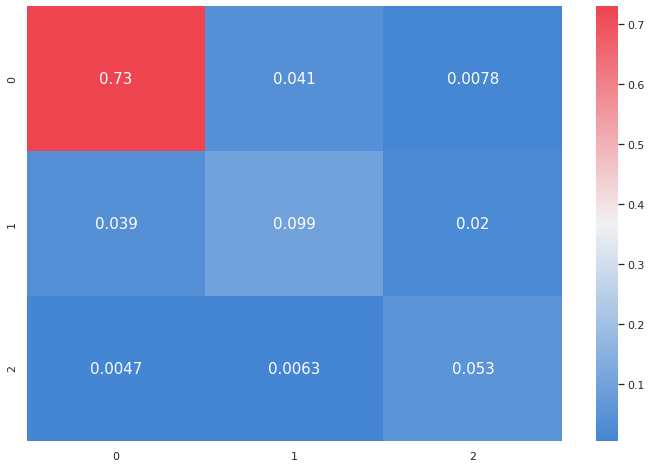

In [28]:
# cofusion matrix
cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(test_y, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})

In [29]:
#Testing the Model on train set
predictions=logreg.predict(train_x)
acccuracy= accuracy_score(train_y,predictions)
acccuracy

0.9038978494623656

In [30]:
acccuracy = accuracy_score(train_y, predictions)
recall = recall_score(train_y, predictions, average="weighted")
precision = precision_score(train_y, predictions, average="weighted")
#f1_score = f1_score(train_y, predictions, average="weighted")

In [32]:
print("Results of Logisitc Regression on Train data")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)

Results of Logisitc Regression on Train data
Accuracy    :  0.9038978494623656
Recall      :  0.9038978494623656
Precision   :  0.9026222718838685


In [33]:
print(classification_report(train_y, predictions))

              precision    recall  f1-score   support

         1.0       0.95      0.96      0.95      1159
         2.0       0.67      0.65      0.66       194
         3.0       0.85      0.80      0.82       135

    accuracy                           0.90      1488
   macro avg       0.82      0.80      0.81      1488
weighted avg       0.90      0.90      0.90      1488



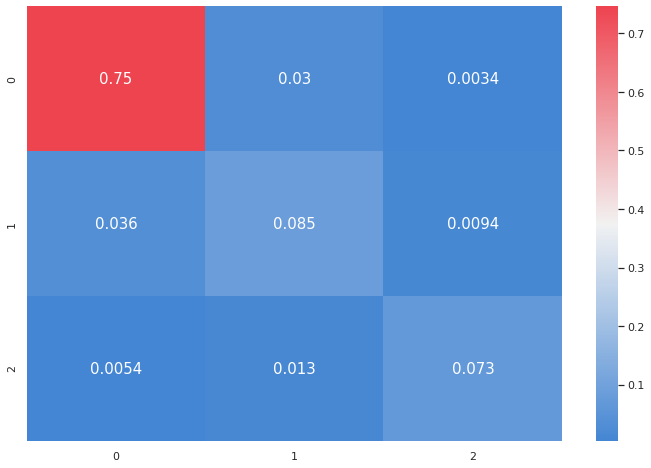

In [34]:
# cofusion matrix
cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(train_y, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})

In [35]:
filename = 'model.pkl'
pickle.dump(logreg, open('model.pkl','wb'))